<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/Pocessamento_DCT2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import cv2

In [0]:
def DCT2D(sinal):
    return fftpack.dct(fftpack.dct(sinal, axis=0, norm='ortho'), axis=1, norm='ortho')

def IDCT2D(sinal):
    return fftpack.idct(fftpack.idct(sinal, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [20]:
x = np.array([[1, 2],
              [3, 4]])
x_dct2 = DCT2D(x)
x_dct2

array([[ 5., -1.],
       [-2.,  0.]])

In [21]:
x_idct2 = IDCT2D(x_dct2)
x_idct2

array([[1., 2.],
       [3., 4.]])

In [0]:
#Código do zigzag retirado em https://github.com/getsanjeev/compression-DCT/blob/master/zigzag.py
def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output

def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

def blockprockdct(imagem,R,n):
    A = n**2 - R
    N,M = imagem.shape
    aux1 = np.zeros((N,M))
    for i in range(0,N,n):
        aux2 = 0
        for j in range(0,M,n):
            aux = imagem[i:i+n,j:j+n]
            aux01 = DCT2D(aux)
            auxdct = zigzag(aux01)
            auxdct[:A:-1]=0
            aux2 = inverse_zigzag(auxdct,n,n)
            aux22 = IDCT2D(aux2)
            aux1[i:i+n,j:j+n] = aux22
    return aux1

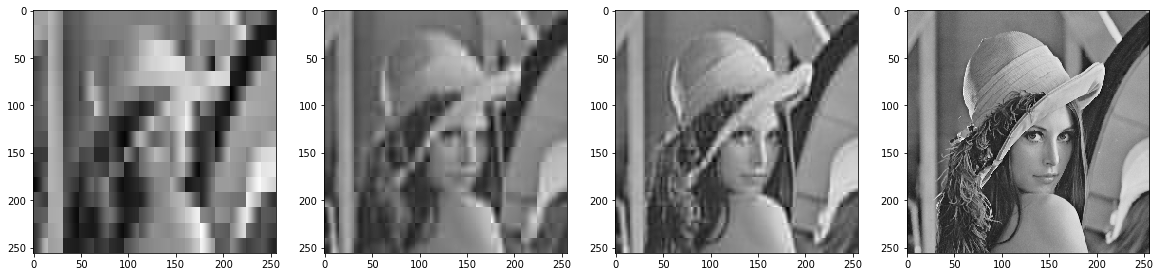

In [60]:
plt.rcParams['figure.figsize'] = (20, 15)

f = cv2.imread("/content/lena.png", cv2.IMREAD_GRAYSCALE)

plt.subplot(1,4,1)
plt.imshow(blockprockdct(f,255,16), cmap="gray");
plt.subplot(1,4,2)
plt.imshow(blockprockdct(f,250,16), cmap="gray");
plt.subplot(1,4,3)
plt.imshow(blockprockdct(f,240,16), cmap="gray");
plt.subplot(1,4,4)
plt.imshow(f, cmap="gray");